# ICP09-CNN
# Rodgers Okeyo Ochieng

Description: Make a copy of the CNN tutorial notebook. Add to this notebook a graph illustrating the training process (display a graph of model loss and model accuracy for both training and test data). 

In [1]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

np.random.seed(1)  # for reproducibility


# Image Readers

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 3879 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

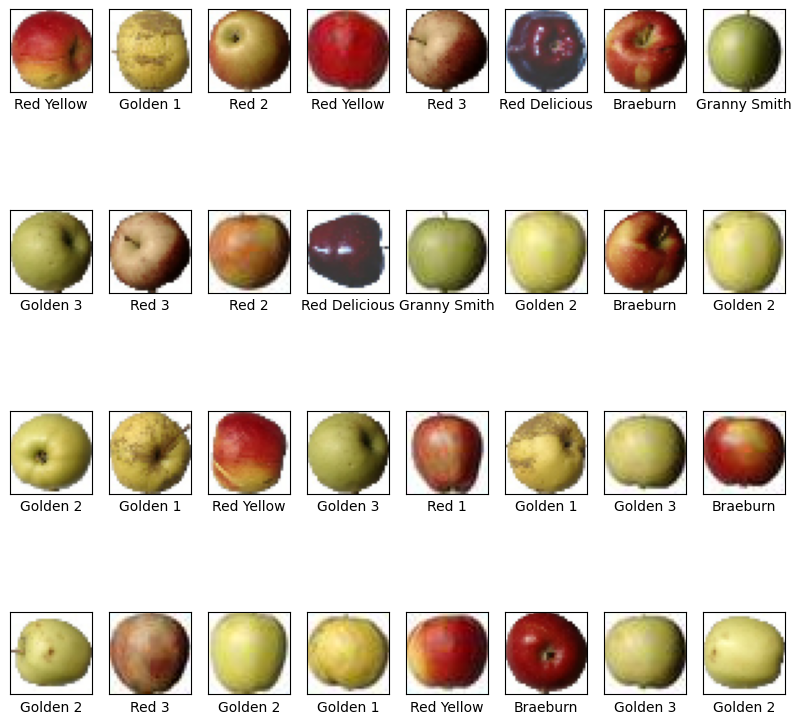

In [3]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices

# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())

# get the first batch of images and associated labels
images, labels = training_generator[0]

# get the size of the batch
batch_size = len(images)

# do some calculations to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols

# display the images
plt.figure(figsize=(10,10))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
# if you prefer to see images without the grid and axes labels, uncomment the following 3 lines    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

## NOTE: This section simply breaksdown some of the code above to show what is happening... this should be removed in production

In [4]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices
print(apple_name_index)

{'Braeburn': 0, 'Golden 1': 1, 'Golden 2': 2, 'Golden 3': 3, 'Granny Smith': 4, 'Red 1': 5, 'Red 2': 6, 'Red 3': 7, 'Red Delicious': 8, 'Red Yellow': 9}


In [5]:
# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Braeburn', 'Golden 1', 'Golden 2', 'Golden 3', 'Granny Smith', 'Red 1', 'Red 2', 'Red 3', 'Red Delicious', 'Red Yellow']


In [6]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [7]:
print(images.shape) # we have 32 images (our batch size) of size 32x32 with 3 channels (RGB)

(32, 32, 32, 3)


In [8]:
print(labels) # we have 32 labels (our batch size) one-hot encoded with 10 classes

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [9]:
# this will take the index for the max value in each one-hot vector and return the class name
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
Golden 1


# Model

To find more about Convulutional layers, see the official documentation found here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [10]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(training_generator, validation_data=(validation_generator), epochs=100, verbose=0)

In [ ]:
# Retrieve the loss and accuracy values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

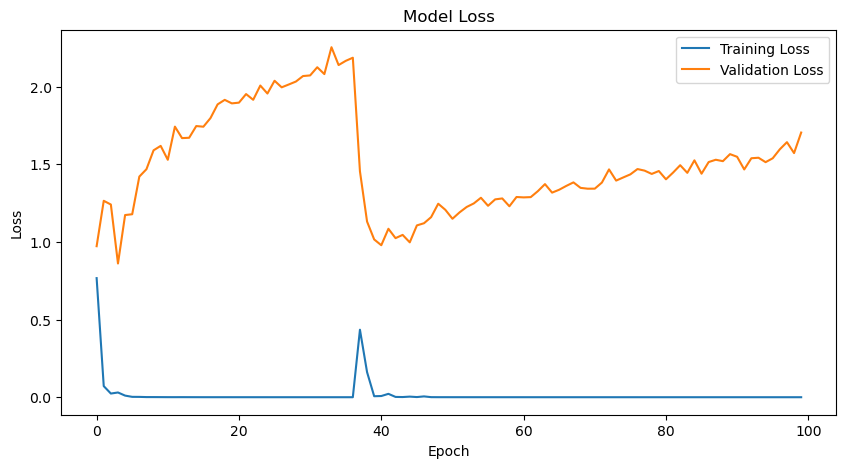

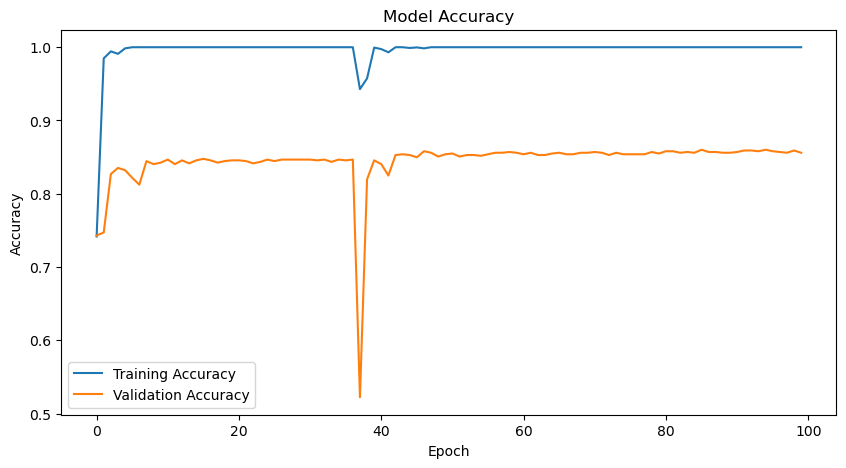

In [13]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Discussion
From graph the model’s validation loss is higher than the training loss and the validation accuracy is lower than the training accuracy in the CNN model this indicates overfitting. The model may have been trained for too many epochs, causing it to excessively fit the training data. As a result, it becomes highly specialized to the training examples, leading to overfitting and poor generalization.

To address the issue we can;
1.	Increase training data: If possible, gather more diverse training data to provide the model with a broader range of examples to learn from. 
2.	Model simplification: Reduce the complexity of the model by decreasing the number of parameters, removing layers, or using pre-trained models as a starting point.
3.	Early stopping: Monitor the validation loss during training and stop training when the validation loss starts to increase or the performance plateaus. This prevents the model from overfitting by finding the optimal point of generalization.
